## STEP 1 -  Get data and clean it

In [189]:
import pandas as pd
import re

def cleanData(text):
    removeList = ["@handle","@handle:"]
    text_r = " ".join([char for char in text.split(' ') if char not in removeList]) 
    return text_r

def removeHyperLink(text):
    text = re.sub(r'http?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    return(text)

def countSpChar(text):
    new = re.sub('[@_!#$%^&*()<>?/\|}{~:\']' ,'', text)
    count = len(text) - len(new)
    return count
    
def removeSpChar(text):
    new = re.sub('[@_!#$%^&*()<>?/\|}{~:\']' ,'', text)
    return new

In [190]:
df_orig = pd.read_table('data/train_tweets.txt',names=('id','rtweet'))

df_orig['tweet'] = df_orig['rtweet'].apply(lambda x: cleanData(x))
df_orig['tweet'] = df_orig['tweet'].apply(lambda x: removeHyperLink(x))
df_orig['spCount'] = df_orig['tweet'].apply(lambda x: countSpChar(x))
df_orig['hastags'] = df_orig['tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df_orig['tweet'] = df_orig['tweet'].apply(lambda x: removeSpChar(x))
df_orig['word_count'] = df_orig['tweet'].apply(lambda x: len(str(x).split(" ")))
df_orig['char_count'] = df_orig['tweet'].str.len()
df_orig['isCapitalize'] = df_orig['tweet'].apply(lambda x: len([x for x in x.split() if x[0].isupper()]))
df_orig['tweet'] = df_orig['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df_orig['isRT'] = df_orig['tweet'].apply(lambda x: 1 if 'rt' in x else 0)

## Rate of RT
#df_orig['atweet'] = df_orig.groupby("id")['tweet'].transform(lambda x: ' '.join(x))
df_orig['TotTw'] = df_orig.groupby("id")['tweet'].transform('count')
df_orig['RTrate'] = df_orig.groupby("id")['isRT'].transform('sum')
df_orig['RTrate'] = df_orig['RTrate']/df_orig['TotTw']


df_orig.tail()


/Users/saransh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


,id,rtweet,tweet,spCount,hastags,word_count,char_count,isCapitalize,isRT,TotTw,RTrate
328190,4357,Steelbox Demonstrates Open Video Framework wit...,steelbox demonstrates open video framework wit...,0,0,13,102,10,0,16,0.1875
328191,4357,Small Businesses Rely on Sage to Help Them Rid...,small businesses rely on sage to help them rid...,0,0,13,66,9,0,16,0.1875
328192,4357,TimeSight Systems™ Announces Next-Generation P...,timesight systems™ announces next-generation p...,0,0,12,98,9,0,16,0.1875
328193,4357,Diebold Makes Its Leading Monitoring Solutions...,diebold makes its leading monitoring solutions...,0,0,10,68,8,0,16,0.1875
328194,4357,GVI Security Solutions to Introduce AutoIP™ VM...,gvi security solutions to introduce autoip™ vm...,0,0,15,98,11,0,16,0.1875


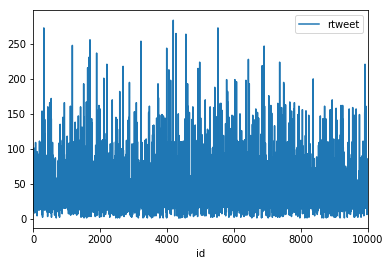

In [174]:
df_orig.groupby("id").count()[['rtweet']].plot()


In [184]:
df_orig[['id','word_count']].max()

id            10000
word_count      895
dtype: int64

In [191]:
### 
## Store data in a file
###

# df_output = df_orig.drop(columns=["rtweet","tweet"])
# df_output.to_csv("features.csv")